In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense, Flatten,Conv2D,MaxPooling2D


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


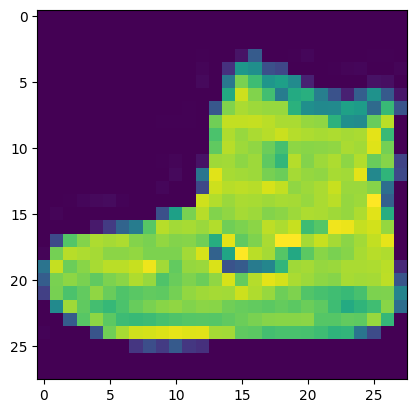

In [ ]:
plt.imshow(train_images[0])

In [ ]:
train_images,test_images=train_images/255.0,test_images/255.0

In [ ]:
import numpy as np

In [ ]:
train_images=train_images.reshape((60000,28,28,1))
test_images=test_images.reshape((10000,28,28,1))

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
cnnmodel=Sequential()

In [ ]:
cnnmodel.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
cnnmodel.add(MaxPooling2D((2,2)))
cnnmodel.add(Conv2D(64,(3,3),activation='relu'))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnnmodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnnmodel.fit(train_images,train_labels,epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 48ms/step - accuracy: 0.8012 - loss: 0.5534
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.9017 - loss: 0.2792
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 46ms/step - accuracy: 0.9163 - loss: 0.2271


In [ ]:
predictions=cnnmodel.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


Prediction for image 0: Ankle boot (class 9)


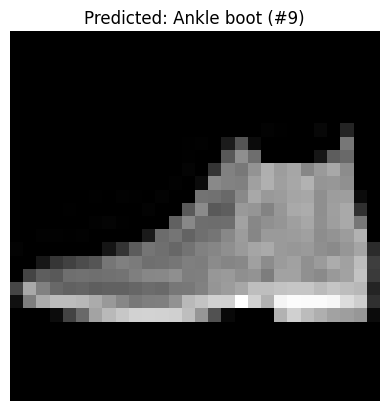

Prediction for image 1: Pullover (class 2)


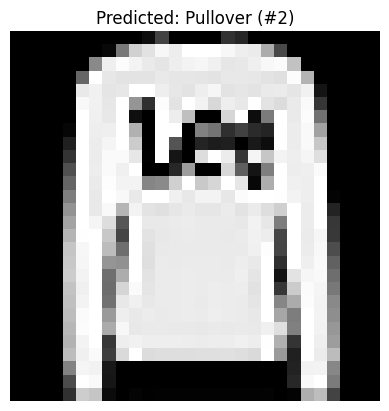

Prediction for image 2: Trouser (class 1)


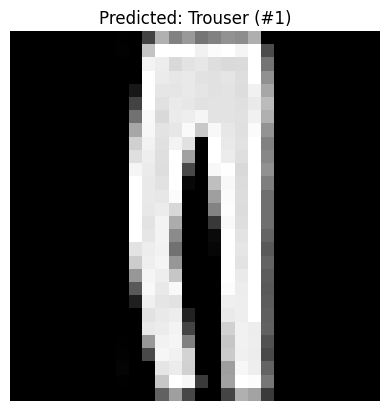

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ensure this exists (once per notebook)
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

def show_predictions(preds, images, num=3):
    for i in range(num):
        class_idx = np.argmax(preds[i])
        label = class_names[class_idx]
        print(f"Prediction for image {i}: {label} (class {class_idx})")
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Predicted: {label} (#{class_idx})")
        plt.axis('off')
        plt.show()

show_predictions(predictions, test_images, num=3)


Saving IMG_7607.JPG to IMG_7607.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction for IMG_7607.JPG: Bag (class 8)


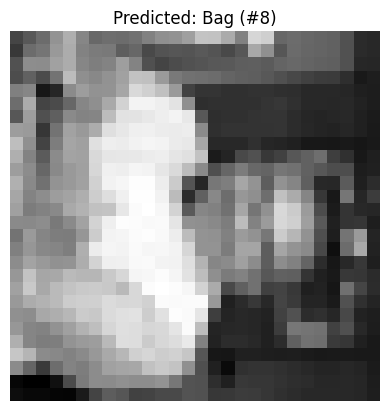

In [ ]:
from google.colab import files
from PIL import Image
import numpy as np

uploaded = files.upload()

for filename in uploaded.keys():
  img = Image.open(filename).convert('L') # Convert to grayscale
  img = img.resize((28, 28)) # Resize to 28x28
  img_array = np.array(img) # Convert to numpy array
  img_array = img_array / 255.0 # Normalize pixel values
  img_array = img_array.reshape(1, 28, 28, 1) # Reshape for model input

  predictions = cnnmodel.predict(img_array)
  predicted_class_index = np.argmax(predictions[0])
  predicted_class_name = class_names[predicted_class_index]

  print(f"Prediction for {filename}: {predicted_class_name} (class {predicted_class_index})")
  plt.imshow(img_array.reshape(28, 28), cmap='gray')
  plt.title(f"Predicted: {predicted_class_name} (#{predicted_class_index})")
  plt.axis('off')
  plt.show()